<h1>eROSITA EDisCS Research Tutorial</h1>

I will be going over how I wrote the code for my eROSITA EDisCS research. We will be using publically available data for the EDisCS survey (White et al. 2005) and publically available data from Data Release 1 of the eROSITA survey (Bulbal et al 2024).

### Introductory Information
The EDisCS survey is short for ESO Distant Cluster Survey. This survey consists of 20 fields containing distant cluster galaxies with redshifts ranging from 0.4 to nearly 1.0. The goal of this survey is to study the evolution of high redhisft galaxies. This matters because observing high redshift galaxies from Earth shows conditions of galaxies from over a billion years ago.

The eROSITA survey is a recent Russian-German cosmological survey that aims to gather a large sample of X-ray clusters in order to contrain cosmological parameters of galaxy evolution. Data release 1 of this survey contains the first 6 months of observations done by the eROSITA telescope. The first data release contained 12,247 galaxy groups and clusters with 8,361 of these sources not being represented in research literature before.

The goal of this research is to analyze how many of the EDisCS clusters are within the bounds of the eROSITA data released by the Germans and understand why some of these clusters may not have been detected. This only contains the western hemisphere of the sky as the eastern hemisphere data of eROSITA is owned by the Russians, who have yet to release their data.

### Part 1: Are EDisCS Clusters Within The Region of eROSITA?

We will first go through how I discovered if any EDisCS clusters are within the eROSITA region and the amount of clusters if any. I copied the RA and Dec values from Table 2 from White et al. 2005 into one .csv file. This .csv file where RA and Dec are in the same columns of the table. This is to fix some issues I was having with a specific packages interacting (Astropy and PyAstronomy). 

We will also be working this the eROSITA longitude limits of 359.94423568 > l > 179.94423568 degrees to determine what EDisCS fall under this area.

We will be importing the following packages for this section:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.coordinates as coord
import astropy.units as u
from astropy.io import ascii
from PyAstronomy import pyasl
from astropy.coordinates import SkyCoord

We will first import the two files into RA and Dec arrays:

In [2]:
# read the data table and import the RA and Dec column into an array
data_combined = ascii.read("ediscs coords topcat.csv", header_start=1, data_start = 2)
ra_dec = data_combined['RA and Dec']

ra_dec_deg = []

# converts the RA and Dec arrays from Sexagesimal coordinates to Decimal Degrees
for i in range(len(ra_dec)):
    ra_dec_deg.append(pyasl.coordsSexaToDeg(str(ra_dec[i])))

# check for if the conversion worked and if it read every set of coordinates
print(ra_dec_deg)

[(154.695, -12.198055555555555), (164.77958333333333, -12.8875), (169.81958333333333, -11.508055555555556), (180.68083333333334, -12.408333333333333), (188.12708333333333, -12.843333333333334), (189.6375, -11.741666666666665), (195.41708333333332, -11.65638888888889), (208.25708333333333, -11.624444444444444), (212.76916666666668, -11.808055555555557), (215.08333333333334, -12.608333333333333), (159.46333333333334, -12.724166666666667), (160.16833333333332, -11.934444444444445), (163.60208333333333, -11.772222222222224), (163.68166666666667, -12.764444444444445), (165.93083333333334, -12.759444444444444), (170.715, -11.608888888888888), (174.54291666666666, -11.560555555555556), (184.18791666666667, -12.021666666666668), (186.99541666666667, -11.586944444444445), (208.54041666666666, -12.516944444444444)]


We now want to slice these coordinates into individual arrays in order to convert them into Galactic coordinates.

In [3]:
# sliced the combined ra and deg to the ra individually
ra_deg = []

for i in range(len(ra_dec_deg)):
    ra_deg.append(ra_dec_deg[i][0])

print(ra_deg)

[154.695, 164.77958333333333, 169.81958333333333, 180.68083333333334, 188.12708333333333, 189.6375, 195.41708333333332, 208.25708333333333, 212.76916666666668, 215.08333333333334, 159.46333333333334, 160.16833333333332, 163.60208333333333, 163.68166666666667, 165.93083333333334, 170.715, 174.54291666666666, 184.18791666666667, 186.99541666666667, 208.54041666666666]


In [4]:
# repeated the step above to get the dec individually
dec_deg = []

for i in range(len(ra_dec_deg)):
    dec_deg.append(ra_dec_deg[i][1])

print(dec_deg)

[-12.198055555555555, -12.8875, -11.508055555555556, -12.408333333333333, -12.843333333333334, -11.741666666666665, -11.65638888888889, -11.624444444444444, -11.808055555555557, -12.608333333333333, -12.724166666666667, -11.934444444444445, -11.772222222222224, -12.764444444444445, -12.759444444444444, -11.608888888888888, -11.560555555555556, -12.021666666666668, -11.586944444444445, -12.516944444444444]


In [5]:
# converts ra/dec from degrees to galactic coordinates using SkyCoord from astropy.coordinates
c_ircs = SkyCoord(ra_deg, dec_deg, frame='icrs', unit=u.deg)
gal_coords = c_ircs.galactic

print(gal_coords)

<SkyCoord (Galactic): (l, b) in deg
    [(254.65031196, 35.9869309 ), (265.09143402, 41.58634242),
     (269.8514829 , 45.36198999), (284.72911769, 48.73408116),
     (295.77817877, 49.76529915), (297.91503018, 51.00449611),
     (306.92580778, 51.13600736), (326.02502259, 48.46626448),
     (331.91449924, 46.53349213), (334.26838629, 44.78686224),
     (259.51217837, 38.63493211), (259.56753637, 39.68191494),
     (262.97271975, 41.84307978), (263.82486148, 41.07968615),
     (266.25424438, 42.31340532), (271.01477183, 45.7021572 ),
     (275.86215467, 47.42359308), (289.68188523, 49.95560531),
     (293.80681528, 50.86874284), (325.93663576, 47.53362081)]>


These will combine the arrays into nested arrays so we must split those arrays again to get seperate arrays for latitude and longitude.

In [6]:
# slices the galactic coordinates above to get the l and b values in seperate arrays
gal_coords_l = gal_coords.l*u.deg
gal_coords_b = gal_coords.b*u.deg

We will now use the longitude coordinate (l) to test how many of the EDisCS fall within the eROSITA region of 359.94423568 > l > 179.94423568 degrees.

In [7]:
# set empty array to find which coordinates are within the limits
in_erosita = []

# checks if the l value of the EDisCS clusters fall in the l limit of the eROSITA data
# longitude limit = 359.94423568 > l > 179.94423568 degrees
for i in range(len(gal_coords_l)):
    if gal_coords_l[i].value > 179.94423568 and gal_coords_l[i].value < 359.94423568:
        in_erosita.append(gal_coords_l[i].value)

In [8]:
# statement to check if the total number number of matches within the eROSITA limits equal the total number of tested coordinates

if len(gal_coords_l) == len(in_erosita):
    print('All EDisCS clusters fall within the eROSITA survey limits')

All EDisCS clusters fall within the eROSITA survey limits


In this case, all EDisCS were within the eROSITA limits. If nothing would've printed from the statement above, I would have printed out the in_erosita array and cross checked coordinates to see which EDisCS were within the bounds.

We now want to plot EDisCS to see how it fits within the eROSITA region. We will highlight what portion of the plot is not within the region of eROSITA.

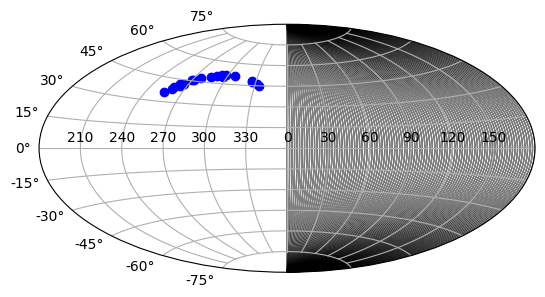

In [9]:
ax = plt.subplot(111, projection='aitoff')
tick_labels = np.array([210,240,270,300,330,0,30,60,90,120,150])
ax.set_xticklabels(tick_labels)
ax.grid(True)

theta_region = np.linspace(0, np.pi, 100)
phi_region = np.linspace(-np.pi/2, np.pi/2, 50)
theta_region, phi_region = np.meshgrid(theta_region, phi_region)
z_region = np.sin(phi_region)

# Fill the region with a color
ax.fill(theta_region, phi_region, color='black', alpha=0.5)

plt.scatter(gal_coords.l.wrap_at('180d').radian, gal_coords.b.radian,color='b')
plt.show()

This plot confirms that the EDisCS we used are within the eROSITA region.

### Part 2: How Many of EDisCS Clusters Have Entries Within the eROSITA Cluster Catalog?

For this part, we need to use the eRODat tool and look at the sky viewer using the cluster catalog to see if any of the EDisCS have catalogs in this survey. This is accessible at https://erosita.mpe.mpg.de/dr1/erodat/skyview/sky/. 

We need to select the eRASS1 cluster Catalog and input our RA and Dec coordaintes to bring the viewer to the location of our clusters. If there is a catalog, there will be a blue dot to indicate it. In this case, we only found a total of two catalogs.

### Part 3: Did Luminosity Play A Part In Why Our Clusters Weren't Detected?

For this part, we will be looking at if the luminsoties of the EDisCS clusters are why they were not detected by eROSITA. This will be done using the EDisCS masses from White et al. 2005 and converting those to luminosities with a mass relation. The mass relation we will use is the first mass-luminosity relation show in the abstract of Yu-Liang et al. 2023.

We will plot these calculated luminosities over the measured luminosities of the eROSITA cluster catalog. The eRASS1 cluster data can be found at the link https://erosita.mpe.mpg.de/dr1/AllSkySurveyData_dr1/Catalogues_dr1/ with the model explaining each header also on this page.

We will first import the following packages:

In [10]:
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from astropy.io import fits
from astropy.cosmology import FlatLambdaCDM
from astropy import units as u

We will now extract the redshift, luminosity, flux, and extinction likelihood for each cluster in the eRASS1 cluster Catalog. Our final plot later on will be luminosity on the y-axis and redshift on the x-axis. We will use the flux to calculate predicted luminosities with the inverse square law to see if our luminosity distances are accurate. Then, we can use the luminosity distances, a flux limit, and the eROSITA redshifts to generate a luminosity curve. The eROSITA clusters will be colorcoded based on the extinction likelihood. This is important as it tells us about the reddening of light from the eROSITA clusters with higher luminosities.

In [11]:
# temporarily opening the fits file in order to extract data from the columns:
# 'BEST_Z' = redshift, 'L500' = luminosity at 500 kpc, 'F500' = flux at 500 kpc, 'EXT_LIKE' = extinction likelihood

with fits.open("erass1cl_primary_v3.2.fits") as hdu:
    data = hdu[1].data
    redshift = data['BEST_Z']
    lum = data['L500']
    flux = data['F500']
    ext = data['EXT_LIKE']

Luminosity values from eRASS1 clusters are given in units of 1e42 ergs/s. We want to convert these values to be in units of ergs/s.

In [17]:
# initalize list for luminosity in ergs 
lum_erg = []

# convert inital luminosity values from units of 1e42 ergs s-1 to ergs s-1
for i in range(len(lum)):
    lum_erg.append(lum[i] * 1e42)

We will use the masses and redshift of the EDisCS clusters from White et al. 2005 and the mass-luminosity relation to find the luminosity for the EDisCS clusters.

In [18]:
# redshift and mass values for EDisCS clusters from White et al. 2005
redshift_ediscs = [0.47,0.46,0.55,0.42,0.54,0.48,0.59,0.52,0.50,0.58,0.70,0.70,0.75,0.96,0.48,0.80,0.63,0.76]
mass_ediscs = [1.42e14,1.86e14,6e12,2.16e14,1.61e15,4.18e14,3.62e14,4.61e14,1.5e13,3.9e14,8.5e13,2.38e14,1.44e14,1.6e13,5.31e14,1.159e15,2.26e14,3.35e14]
# mass-luminosity relation L = (10^(28.46+0.03))(M^(1.024+0.002))
lum_ediscs = []

# convert the mass and redshift of the EDisCS clusters to luminonsity
for i in range(len(mass_ediscs)):
    L_ediscs = (10**(28.46+0.03))*((mass_ediscs[i])**(1.024+0.002))
    lum_ediscs.append(L_ediscs)

Now, we have what we need to plot the luminosity of the EDisCS clusters over the luminosity of the eROSITA clusters:

<function matplotlib.pyplot.show(close=None, block=None)>

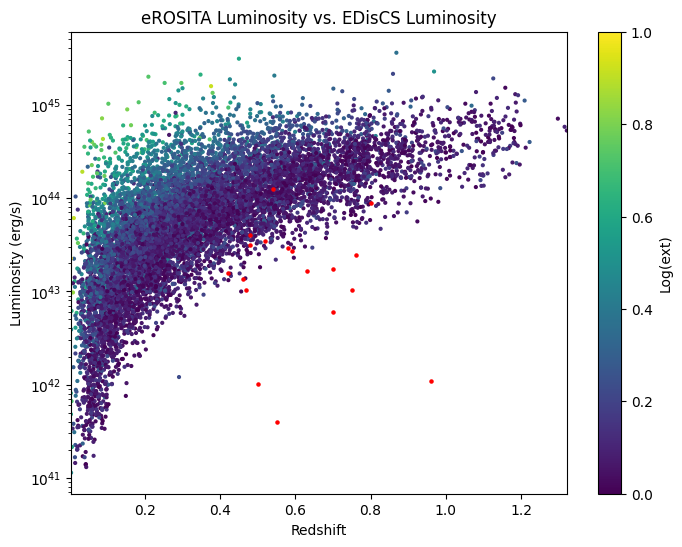

In [19]:
# plotted the observed eROSITA luminosities (inferno cmap) versus the calculated luminosites of the EDisCS survey (red scatterpoints)
plt.figure(figsize=(8, 6))
plt.margins(x=0)
plt.title('eROSITA Luminosity vs. EDisCS Luminosity')
plt.xlabel('Redshift')
plt.ylabel('Luminosity (erg/s)')
plt.yscale('log')
plt.scatter(redshift,lum_erg,c=(np.log10(ext)),s=4)
plt.scatter(redshift_ediscs,lum_ediscs,s=5,color='red')

# added a colarbar to display the log10(extinction likelihood) against the observed luminosites of eROSITA
plt.colorbar(cmap='inferno',label='Log(ext)')
plt.show

We will now make a cosmological object to find the luminosity distances from our redshift and use the distances and the eROSTIA flux to predict luminosities. We will then use the luminosity distances and a flux limit to generate luminosity limits. Then, we will plot the luminosity limits over redshift to plot a luminosity curve as a reference. This reference will allow us to analyze why only two EDisCS clusters were detected by eROSITA.

In [20]:
# generated cosmology object
cosmo =  FlatLambdaCDM(H0=70 * u.km / u.s / u.Mpc, Om0=0.3)
lum_distance = []

# used the cosmology object to find the luminosity distances for each redshift
for i in range(len(redshift)):
    distance = cosmo.luminosity_distance(redshift[i]) 
    lum_distance.append(distance)

Our eROSITA flux values are in units of 1e-14 erg/s/cm2 and we want these values to be in erg/s/cm2. We will do this by conversion.

In [21]:
# initalized an array for changing the units of the inital flux array
flux_corrected = []

# changed flux values from units 1e-14 erg/s/cm2 to erg/s/cm2
for i in range(len(flux)):
    flux_corrected.append(flux[i]* u.erg / u.s / u.cm**2 * 1e-14)

We will now use the luminosity distance array and the flux array to predict what our luminosities for the eROSITA clusters should be. If these values are similar to the ones that eROSITA measured, we know our luminosity distances are accurate.

In [22]:
# initalized array for the predicted luminosities 
pred_lum = []

# inputted flux and luminosity distances into inverse square law and checedk predicted luminosities against observed luminosities
for i in range(len(redshift)):
    L = ((flux_corrected[i])*4*(math.pi)*((lum_distance[i])**2)).to(u.erg / u.s)
    pred_lum.append(L)

Since our predicted luminosity values are similar to the measured luminosity values, we can start generating an array for luminosity based off a flux limit of 4e-14 ergs/s/cm2:

In [23]:
# initialized flux limit and luminosity curve array
flux_limit = 4e-14 * u.erg / u.s / u.cm**2
L_limit = []

# calculated luminosity curve with inputting luminosity distances and the flux limit into the inverse square law
for i in range(len(redshift)):
    L = (4 * np.pi * (lum_distance[i])**2 * flux_limit).to(u.erg / u.s)
    L_limit.append(L)

In order to plot the luminosity curve on our luminosity plot from before, we must make the luminosity limit array dimensionless. We do this by making each Quantity object in our array into values. We also will use a check to keep the redshift and luminosity limit values within the current bounds of the luminosity graph.

In [24]:
# initalized arrays for the correction of the astropy Quantity lists
L_limit_fix = []
redshift_final = []

# set a range for luminosity and redshift ranges that we care about and corrected each member of the luminosity curve and redshift to be dimensionless
for i in range(len(L_limit)):
    if redshift[i] < 1.4 and L_limit[i].value > 5e41:
        L_limit_fix.append(L_limit[i].value)
        redshift_final.append(redshift[i])

Finally, we can plot our luminosity curve on our luminosity plot:

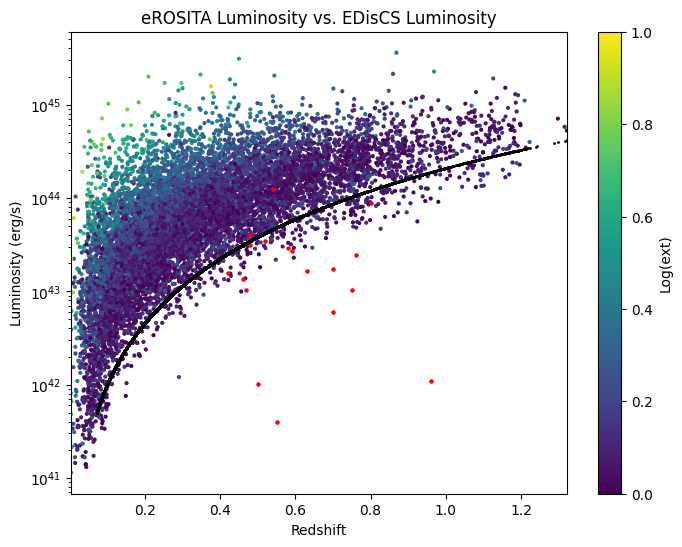

In [25]:
# plotted the same eROSITA Luminosity vs. EDisCS Luminsity plot with an overlaid luminosity limit curve (black)
plt.figure(figsize=(8, 6))
plt.margins(x=0)
plt.title('eROSITA Luminosity vs. EDisCS Luminosity')
plt.yscale('log')
plt.xlabel('Redshift')
plt.ylabel('Luminosity (erg/s)')
plt.scatter(redshift,lum_erg,c=np.log10(ext),s=4)
plt.scatter(redshift_ediscs,lum_ediscs,s=5,color='red')
plt.colorbar(cmap='inferno',label='Log(ext)')
plt.scatter(redshift_final, L_limit_fix, label='Luminosity Curve',s=1,color='black')
plt.show()

This plot shows that our two detected EDisCS clusters are the only two clusters above the luminosity curve. This means it is likely that the other EDisCS clusters were not detected because of their luminosities.